## Abstract:
This post explores advanced optimization methods for logistic regression: Newton's Method and the Adam optimizer. I implement both from scratch, compare them to gradient descent with momentum, and evaluate their convergence behavior and efficiency on a binary classification task.

In [1]:
from logistic import AdamOptimizer, LogisticRegression, NewtonOptimizer, GradientDescentOptimizer

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def run_experiment(model_class, optimizer_class, optimizer_args, X, y, steps=50):
    model = model_class()
    optimizer = optimizer_class(model)
    losses = []
    times = []
    
    for i in range(steps):
        start = time.time()
        optimizer.step(X, y, **optimizer_args)
        elapsed = time.time() - start
        loss = model.loss(X, y).item()
        losses.append(loss)
        times.append(elapsed)
    
    return losses, np.cumsum(times)


In [2]:
import torch
def add_bias(X):
        """
        Adds a column of ones to X to account for the intercept term :D.

        Arguments:
            X, torch.Tensor: The feature matrix of size (n, p)

        Returns:
            X_with_bias, torch.Tensor: New matrix of size (n, p+1)
        """
        n = X.size(0)
        ones = torch.ones(n, 1) # make da onessss 
        return torch.cat((X, ones), dim=1)

## Breast Cancer Dataset for Testing

In [4]:
import pandas as pd
#reading in the data
breast_cancer = pd.read_csv("C:/Users/liapu/OneDrive/Desktop/Fall 2024/breast-cancer.csv")
breast_cancer.head()

#turning pd data frames into torch tensors
target = breast_cancer['diagnosis'].map({"M": 1, "B": 0})
data = breast_cancer.drop('diagnosis', axis = 1)
data = data.drop('id', axis = 1)

X = torch.tensor(data.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype = torch.float32)
add_bias(X)
data.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Newton's Method

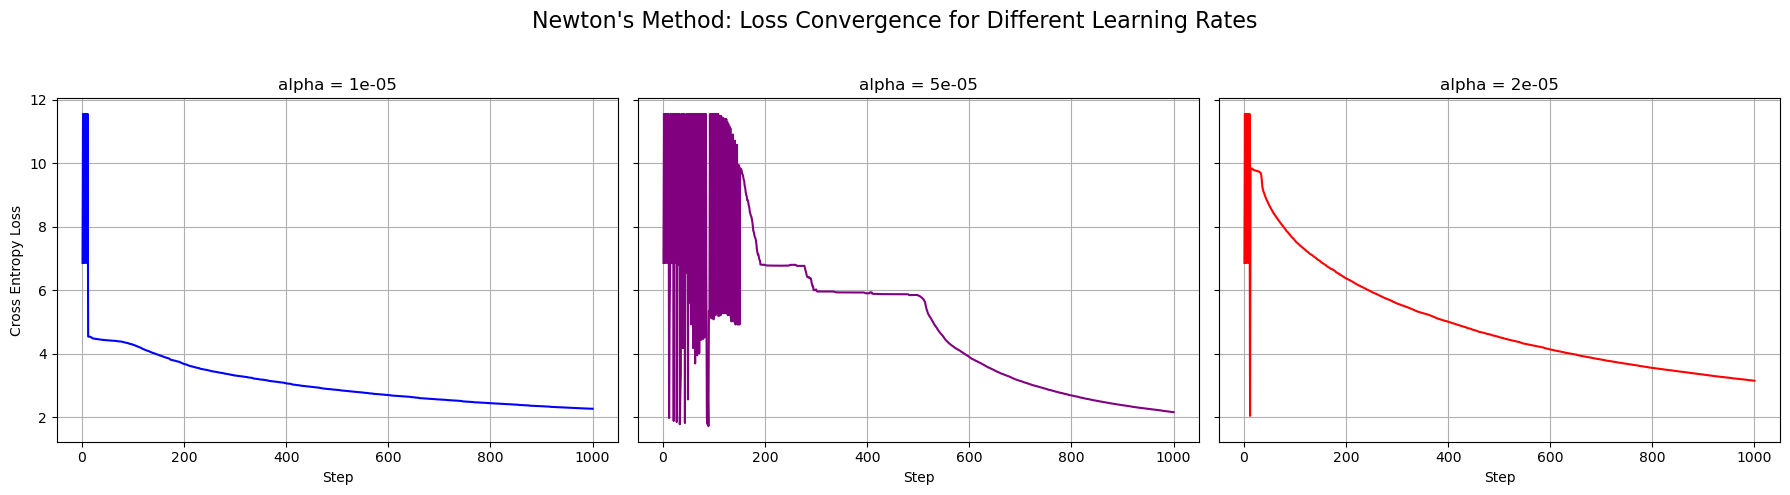

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch


alphas = [0.00001, 0.00005, 0.00002]
colors = ['blue', 'purple', 'red']
labels = [f"alpha = {a}" for a in alphas]

steps = np.arange(1, 1001) 
all_losses = []

for alpha in alphas:
    LR = LogisticRegression()
    opt = NewtonOptimizer(LR)
    losses = []

    for i in range(1000):
        opt.step(X, y, alpha=alpha)
        loss = LR.loss(X, y).item()
        losses.append(loss)
    
    all_losses.append(losses)

# Ploooting all
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (losses, color, label) in enumerate(zip(all_losses, colors, labels)):
    axs[i].plot(steps, losses, color=color)
    axs[i].set_title(label)
    axs[i].set_xlabel("Step")
    if i == 0:
        axs[i].set_ylabel("Cross Entropy Loss")
    axs[i].grid(True)

fig.suptitle("Newton's Method: Loss Convergence for Different Learning Rates", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


The Newton Method of Gradient Descent seems to be able to converge at a good solution quickly, but take a bit more time to find an extremely optimal solution to the weight vector. 

## Adaptive Momentum

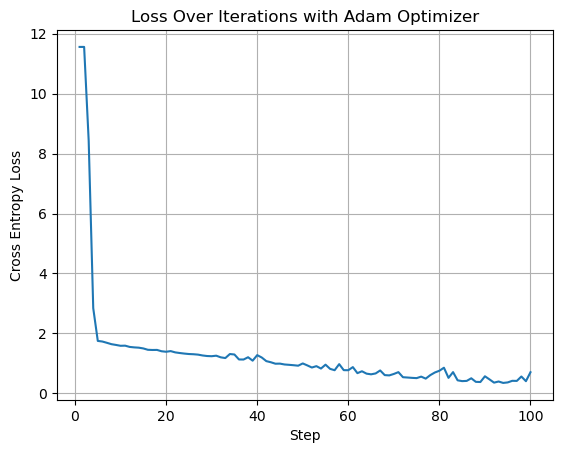

In [9]:
# Initializer
LR = LogisticRegression() 
opt = AdamOptimizer(LR)
steps = np.arange(1, 101)
cross_entropy_loss_adam = []

#100 steps
for i in range(100):
    opt.step(X, y, alpha=0.01, beta1=0.9, beta2=0.999, eps=1e-8, batch_size=32)
    loss = LR.loss(X, y).item()
    cross_entropy_loss_adam.append(loss)

# Plot the loss curve
plt.plot(steps, cross_entropy_loss_adam)
plt.xlabel("Step")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss Over Iterations with Adam Optimizer")
plt.grid(True)
plt.show()


This method converges so quickly and does such a good job of finding an optimal solution. I'm extremely impressed with the adaptive momentum algorithm.

## Newton's Method Versus Adaptive Momentum:

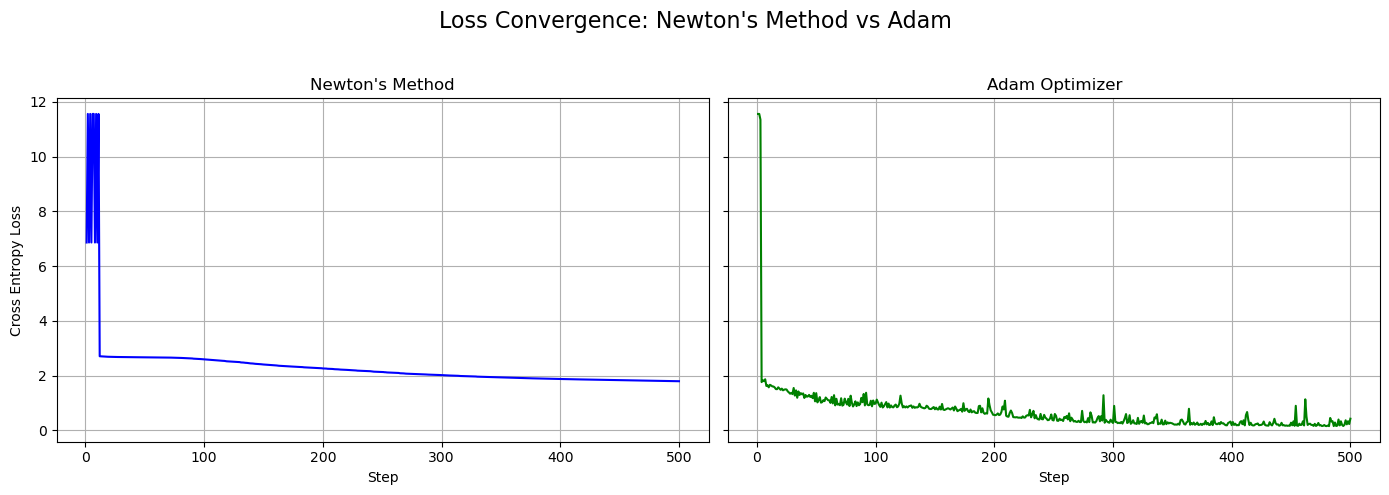

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#Newton's Method
LR_newton = LogisticRegression()
opt_newton = NewtonOptimizer(LR_newton)
newton_losses = []

for i in range(500):
    opt_newton.step(X, y, alpha=0.00001)
    loss = LR_newton.loss(X, y).item()
    newton_losses.append(loss)

#Adam
LR_adam = LogisticRegression()
opt_adam = AdamOptimizer(LR_adam)
adam_losses = []

for i in range(500):
    opt_adam.step(X, y, alpha=0.01, beta1=0.9, beta2=0.999, eps=1e-8, batch_size=32)
    loss = LR_adam.loss(X, y).item()
    adam_losses.append(loss)

#Comparison plot (500 steps)
steps = np.arange(1, 501)

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].plot(steps, newton_losses, color='blue')
axs[0].set_title("Newton's Method")
axs[0].set_xlabel("Step")
axs[0].set_ylabel("Cross Entropy Loss")
axs[0].grid(True)

axs[1].plot(steps, adam_losses, color='green')
axs[1].set_title("Adam Optimizer")
axs[1].set_xlabel("Step")
axs[1].grid(True)

fig.suptitle("Loss Convergence: Newton's Method vs Adam", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Reiterating what I said previously, Newton's method seems to have a bit of a faster initial convergence, but then gets stuck at a suboptimal local minima, while adaptive momentum seems to find a quite ideal solution extremely quickly. Additionally, the hessian matrix is more computationally expensive than adaptive momentum, making adam preferable. Maybe I just need to find a better learning rate. 

## Conclusion 
State of the art Optimizer algorithms are crucial for conserving runtime in machine learning while obtaining optimal weights for mapping the data. Adaptive Momentum really seems to take the cake with runtime, and convergence. 